# Subspaces 

### via Linear Regression and Linear Projections

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import subspaceutil
from subspaceutil import project_onto_subspace, plot_projection

## Linear Regression with Scikit-learn
The pre-canned version of linear regression as implemented in scikit-learn, is much faster and more stable than our version. (You can use your own version if you like, but you'll have to be a lot more careful!)

In this set of exercises we'll perform linear regression on a toy dataset to gain some intuition about the resulting subspaces generated. 

### Load in some dummy data
$x$ and $y$ are vectors generated from an arbitrary function. Plot the data to see what we're dealing with.

In [2]:
np.random.seed(42)
x, y = subspaceutil.generate_data(n=200)

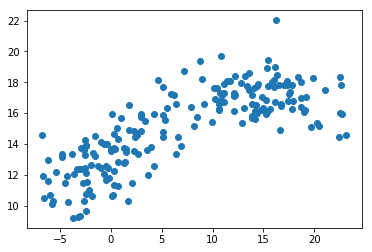

In [3]:
# plot the data
plt.scatter(x,y)

### Scikit-learn's Linear Regression
Take a look at the docs of `LinearRegression` using the `?` operator of IPython.

Do we need to pre-pend a vector of ones to our data matrix as before?

### Fit the model to predict $y$ from $x$.

i.e. $y = X\,\mathbf{w}$, where $X = [1\,\,x]$.

The API always requires the instantiation of the model object before fitting it. If you haven't used sklearn before, the workflow looks like:

* Instantiate model: `m = SklearnModel(options=...)`
* Fit the model: `m.fit(x, y)`
* Predict from the model: `m.predict(new_x)`

Then investigate the model fit:

* Calculate the predictions of $\hat{y}_i$ for each of the $x_i$'s.
* Make a scatter plot of the original data and overlay with the predictions.
    * Using a second scatterplot to plot the predictions is fine.

Note that these **predictions are the projection of your original datapoints to the 1D space**.

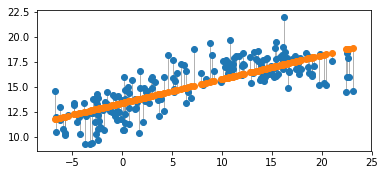

In [4]:
lreg = LinearRegression(fit_intercept=True)   #instatiating an object of class LinearRegression
lreg.fit(x,y)                                 #fit our data x and y

#we are now going to overlay our prediction on a scatterplot
#let us get our prediction first
y_hat =  lreg.predict(x)
plt.scatter(x, y)
plt.scatter(x, y_hat)

#in the scatterplot below, each of the orange dot is the prediction that linear regression has made. Each of the blue dot is
#the original data

#we can also draw all the little lines that we have in the slides. To do this we loop over all the datapoints from 0 to n the
#length of X and plot by repeating the x co-ordinate twice usig numpy repeat, then we do the y co-ordinate

# we show the vertical projections onto the prediction here
for i in range(len(x)):
    plt.plot(np.repeat(x[i], 2), [y[i], y_hat[i]], color="grey", linewidth=0.6, zorder=0)

#plt.gcf().set_size_inches(5,4)     #use this to set the aspect ratio
#or we could use matplotlib
ax  = plt.gca()
ax.set_aspect('equal')

In [5]:
lreg.coef_                   #looking at properties of the coefficient

array([[0.23905464]])

In [6]:
lreg.intercept_              #looking at the intercept

array([13.36169759])

### Calculate the model loss on this dataset

Remember that:

$\qquad\qquad\qquad L \quad\!\!=\quad\!\! \|y - \hat{y}\|_2^2 \quad\!\!=\quad\!\! \sum_{i=1}^n (y_i - \hat{y}_i)^2$

i.e. the sum of squared errors.

In [7]:
#there are various ways to do this we will use
L_y = np.sum((y-y_hat)**2)
print("Loss using L2 norm and numpy is: {0:.2f}".format(L_y))
# for completeness we'll compute this with and without norm functions.
L_y = np.linalg.norm(y - y_hat)**2
print("Loss using L2 norm is: {0:.2f}".format(L_y))
L_y = sum([(y - yh)**2 for y, yh in zip(y, y_hat)])[0]   # 0D array
print("Loss using sum of squared error is: {0:.2f}".format(L_y))


Loss using L2 norm and numpy is: 507.51
Loss using L2 norm is: 507.51
Loss using sum of squared error is: 507.51


### Now fit the model in reverse, to predict $x$ from $y$.

Perform all the same steps:
* model fitting
* prediction
* plots

but predicting $x$ from $y$. You'll want to call your model something different in this case so we can re-use both in a later stage.

Does the subspace generated look the same as for the first model?

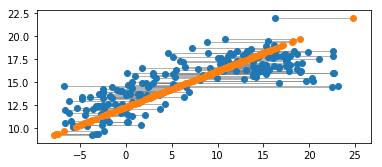

In [8]:
lreg_rev = LinearRegression()   # fit_intercept defaults to True
lreg_rev.fit(y, x)

x_hat =  lreg_rev.predict(y)


#now let us plot this
plt.scatter(x, y)
plt.scatter(x_hat, y)


for i in range(len(x)):
    plt.plot((x[i], x_hat[i]), [y[i], y[i]], color="grey", linewidth=0.6, zorder=0)

#plt.gcf().set_size_inches(5,4)     #use this to set the aspect ratio
#or we could use matplotlib
ax  = plt.gca()
ax.set_aspect('equal')

#from the plot below we can see that the residuals are much larger, they go horizontally and what's more the subspace looks
#a little different to the one above, maybe not super obvious, but maybe a little different

### Calculate the model loss for the new model

Now,

$\qquad\qquad\qquad L \quad\!\!=\quad\!\! \|x - \hat{x}\|_2^2 \quad\!\!=\quad\!\! \sum_{i=1}^n (x_i - \hat{x}_i)^2$

Is the model loss approximately the same this way around? Why / why not?

In [9]:
#there are various ways to do this we will use
L_x = np.sum((x-x_hat)**2)
print("Loss using L2 norm and numpy is: {0:.2f}".format(L_x))
# for completeness we'll compute this with and without norm functions.
L_x = np.linalg.norm(x - x_hat)**2
print("Loss using L2 norm is: {0:.2f}".format(L_x))
L_x = sum([(x - xh)**2 for x, xh in zip(x, x_hat)])[0]   # 0D array
print("Loss using sum of squared error is: {0:.2f}".format(L_x))

# The model loss is much greater because the variance in the x direction is greater than the y direction
# Note the scale for the x's goes from -10..30. Therefore the sum of squares for these distances is much larger.


Loss using L2 norm and numpy is: 5412.53
Loss using L2 norm is: 5412.53
Loss using sum of squared error is: 5412.53


### Calculate predictions when using the models in reverse

Since in each case we've learned a subspace in 2 dimensional space, we are at liberty to use a model to predict the opposite relationship on which it is trained. The coefficients can be extracted from each model as:

```python
w_0 = model.intercept_
w_1 = model.coef_
```

Let us suppose we are re-using the first model, trained for the relationship

$$ \hat{y} = w_0 + w_1 x. $$

The reverse relationship is simply:

$$ \hat{x} = -w_0/w_1 + y/w_1. $$

Calculate the predictions with the "reverse" Linear Regression subspace and compare the losses with those obtained using the optimal "correct" Linear Regression subspace.

In [10]:
#now what we are going to do is to use these two subspaces that we have learned for the wrong task. So, part ofthe emphasis
#of this is saying that linear regression finds subspaces, finding a maximum variant subspace finds a different subspace, but
#all of these subspaces can in principle be used for predictions. It is just that some of them are optimal and some are not.
#We know that predicting x from y and y from x gives us different subspaces but how much worse is it to use one versus the other
#so that is what we are now going to find out.
#The first thing we need to do is to convert our models to the opposite format, so for instance in our very first model we
#we had the equation ŷ =w0+w1x, in order to use this same subspace for preducting x from y we changed it to x̂ =−w0/w1+y/w1.
#let us do this now

In [11]:
x_hat_rv = -lreg.intercept_/lreg.coef_ + y/lreg.coef_
y_hat_rv = -lreg_rev.intercept_/lreg_rev.coef_ + x/lreg_rev.coef_

In [12]:
#we can now look at whatthe losses are in both cases
np.linalg.norm(x-x_hat_rv)**2               #notice this output is much higher than before, so we have done worse

8880.726456664383

In [13]:
np.linalg.norm(y-y_hat_rv)**2               #notice this output is much higher than before, so we have done worse

832.7041936715601

In [14]:
#the leson learnt here is that you can use these subspaces for tasks they were not optimal for but ofcourse they will
#perform worse.

In [15]:
#We are now going to look at othogonal projections and the maximum subspaces variant in our exercises. you may recall from the
#notes that we could find this find this projection operator as something that was the minimum of the distance between y and
#some point in a subspace. Let us be a bit more concrete about what this matrix A is doing. In the examples above A would be
#defining the slope of the orange line. A would be a 2 x 1 matrix (2 rows and 1 column). The fact that there is only one column
#indicates that there is only one degree of freedom in which a point can move in that subspace. the two rows indicate that
#it is a subspace embedded in a two dimensional space. Suppose A was equal to the column vector (1,1) then it would be the 45
#degrees line that goes to the origin at 45 degrees.

------------
Orthogonal Projections
The above regressions are projecting the observations first vertically and then horizontally, and learning the subspace that minimizes the resulting squared residuals. In this exercise, we will take an unsupervised approach, trying to find a structure that best captures the entire dataset.

We will calculate "orthogonal" or perpendicular projections onto a 1D subspace (a "line"!), rotated at various angles.

### Calculating the projection

In the slides, we mention that the projection of $y$ onto the subspace spanned by the columns in $A$ is

Ay:=argminu∥y−Au∥22
PAy:=arg⁡minu∥y−Au∥22

Since this is a quadratic function, it can be solved exactly. We do not want to over-burden you with the maths at this point, but for those who are interested, the result can be found on <a href="https://en.wikipedia.org/wiki/Projection_(linear_algebra)#Orthogonal_projections">Wikipedia (see the 'Formulas' section)</a>, and for those who want to delve deeper into this, [Gilbert Strang's lecture on projections](https://www.youtube.com/watch?v=Y_Ac6KiQ1t0) is an excellent resource.

A couple of useful functions have been imported from our utils file: briefly familiarise yourself with what they do, but do not worry about the details.

In [16]:
?project_onto_subspace

In [17]:
?plot_projection

### Create a matrix out of the vectors $x$ and $y$, and center
Projections are much easier on linear subspaces which pass through the origin. It therefore makes sense to ensure our data also goes through the origin. (This is not a serious problem, since it is easy to subtract the mean before a transformation and then add it back on afterwards.)

* Create a $200 \times 2$ matrix out of the two vectors $x$ and $y$. `np.hstack` may be useful.
* Subtract the mean so that each column has mean 0.

In [18]:
X = np.hstack((x, y))
X -= X.mean(0)


### Create a matrix which defines a subspace rotated at angle $\theta$

The matrix $\begin{pmatrix} a \\ b \end{pmatrix}$ defines a line with slope $\frac{b}{a}$ through the origin. It is more useful to think of the rotation of the plane with respect to the x-axis. Such a matrix can be defined by

$$ A(\theta) = \begin{pmatrix} cos(\theta) \\ sin(\theta) \end{pmatrix} $$

Hint: numpy has a number of useful mathematical functions such as `np.sin`, `np.cos`, `np.pi`.

Make sure that the resulting matrix has dimensions $2 \times 1$.

In [19]:
def A(theta):
    
    el1 = np.cos(theta * np.pi/180)
    el2 = np.sin(theta * np.pi/180)
    return np.array([el1, el2]).reshape(2,1)

### Calculate the projection onto the subspace of angle $\theta$
Using the `project_onto_subspace` function defined above, project the **centered** data matrix onto a subspace at a $45^\circ$ angle. 

Note that the function returns two values. The first returns the (2D) co-ordinates in the original space. The second contains the (1D) co-ordinates in the subspace defined by $A(\theta)$, in this case $A(45)$.

In [20]:
projected_X, X_new_coods = project_onto_subspace(A(45), X)

### Inspect the projection
Calculate the variance of the data embedded in this subspace. You may find the function `np.var` helpful.

Plot the 2D co-ordinates (the first return value) with the original datapoints, using the `plot_projection(X, projX)` function also defined above.

Variance in 1D subspace: 54.46


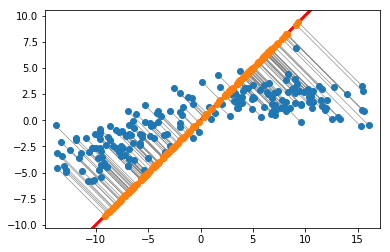

In [21]:
plot_projection(X, projected_X)
print("Variance in 1D subspace: {:.2f}".format(np.var(X_new_coods)))

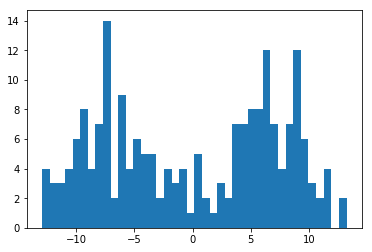

In [22]:
# you might want to also have a look at what we see from the projections in the subspace
# via a histogram. Do we learn any additional information from this view?
plt.hist(X_new_coods, bins=40);
# The dataset comprises two clusters in this view; the data are more sparse in the centre.
# This is not merely an artefact of the angle of the plane: the data were generated from two
# clusters (the bonus of using synthetic data).

In [23]:
#We will now try to find the maximum variant subspace. While there is a closed form solution again for this, as an exercise
#it might be interesting to try and locate this manually. What we want to do is look at what we did before is calculate the
#projection and look at its variants and optimise over the angle of the subspace, so we want to maybe define some theta which
#maximises this variant. Lets us brute force this by trying various theta.

### Explore how the variance changes as the angle of the subspace changes
Try various angles of subspace, plotting as desired.

Calculate the variance over a wide range of angles, and try to find the $\theta$ that maximises the variance.

In [24]:
# we only need to try angles between 0:180, and clearly we're going to do best from between 0:30, so we
# focus efforts here.
trials = np.linspace(10,30,10000)
results = np.zeros(10000)
for i, theta in enumerate(trials):
    projected_X, X_new_coods = project_onto_subspace(A(theta), X)
    results[i] = np.var(X_new_coods)

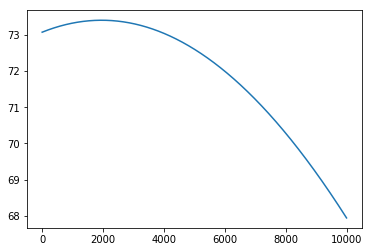

In [25]:
plt.plot(results)

In [26]:
#let us get our best value and then use this result to get our best theta
best_ix = np.argmax(results)
best_theta = trials[best_ix]
print("The best value theta is approximately: {:.2f}".format(best_theta))

The best value theta is approximately: 13.91


The variance in 1D is: 73.40


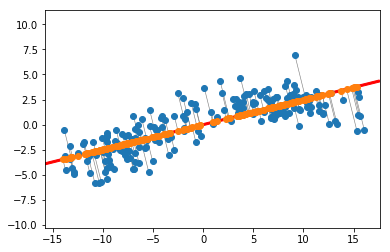

In [27]:
# Once you have a good value of theta, visualise it to see how this agrees with your intuition.
#This output agrees with our intuition that the subspace lies right through the middle ofthe data in the scatterplots
#capturing as much variants as it can. Now we will have a check to confirm our intuition 
projected_X, X_new_coods = project_onto_subspace(A(best_theta), X)
plot_projection(X, projected_X)
print("The variance in 1D is: {:.2f}".format(np.var(X_new_coods)))

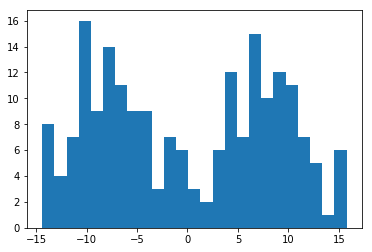

In [28]:
# you might want to also have a look at what we see from the projections in the subspace via a histogram.
#Do we learn any additional information from this view?
plt.hist(X_new_coods, bins=25);


#Here we see the evidence of two clusters which we did not see in our originl data. this is one benefit of what it allows us
#to see

### How does the 'maximum variance' plane compare to those calculated from linear regression?

Plot the subspaces (lines) calculated from:
* Linear Regression $\hat{y} = w_0^{(y)} + w_1^{(y)} x$
* Linear Regression $\hat{x} = w_0^{(x)} + w_1^{(x)} y$
* Maximising variance (this section)

on the same chart. Make yourself comfortable with why these are all different. What do you notice about the maximum variance subspace?

Hint: Remember that you centered the matrix before calculating the maximum variance subspace.

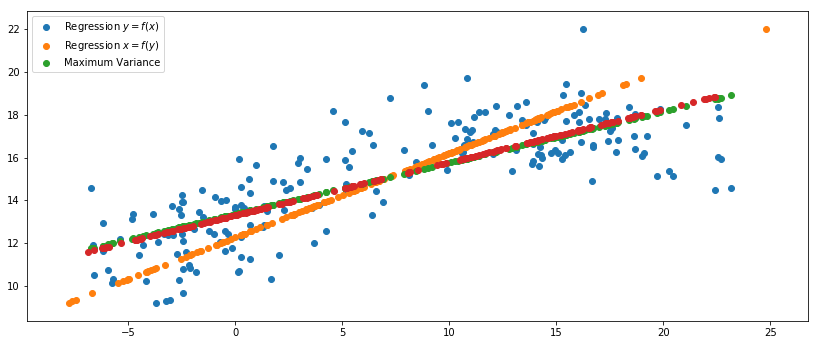

In [29]:
plt.scatter(x, y, label='_nolegend')
plt.scatter(x_hat, y);
plt.scatter(x, y_hat);
plt.scatter(projected_X[:,0] + x.mean(), projected_X[:,1] + y.mean());
plt.legend([r"Regression $y = f(x)$", r"Regression $x = f(y)$", "Maximum Variance"])
plt.gcf().set_size_inches(14,14)
plt.gca().set_aspect('equal')